In [1]:
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from utils import load_data_from_csv
import seaborn as sns
%matplotlib inline

# Load data from csv file

In [2]:
X_dev, X_test, y_dev, y_test = load_data_from_csv(10)

In [3]:
X_dev

Age  Diastolic BP  Poverty index  Race  Red blood cells  \
7539  59.0         110.0          230.0   2.0             59.5   
9311  36.0          80.0          233.0   1.0             51.3   
58    69.0          88.0           72.0   1.0             77.7   
8039  27.0          74.0          351.0   1.0             47.6   
8008  53.0          86.0          417.0   1.0             54.7   
...    ...           ...            ...   ...              ...   
7044  68.0          92.0          166.0   1.0             48.8   
6487  69.0          90.0          215.0   1.0             50.2   
6695  65.0          76.0           76.0   1.0             54.4   
887   47.0          60.0          999.0   1.0             42.5   
8605  39.0          90.0          110.0   1.0             48.1   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
7539                20.0            4.1              230.0        67.0   
9311                 9.0            4.2              166.0        77.0   
58                  52.0            3.4              142.0        35.0   
8039                14.0            4.4              148.0       123.0   
8008                 6.0            4.3              172.0        50.0   
...                  ...            ...                ...         ...   
7044                17.0            4.7              320.0       135.0   
6487                27.0            4.4              229.0        85.0   
6695                20.0            4.5              259.0        85.0   
887                 27.0            4.1              166.0        89.0   
8605                 7.0            4.2              206.0        84.0   

      Serum Magnesium  Serum Protein  Sex  Systolic BP   TIBC    TS  \
7539             1.76            7.2  2.0        218.0  326.0  20.6   
9311             1.77            6.9  2.0        110.0  431.0  17.9   
58               1.80            8.1  2.0        148.0  235.0  14.9   
8039             1.56            6.9  2.0        110.0  461.0  26.7   
8008             1.63            6.9  2.0        142.0  319.0  15.7   
...               ...            ...  ...          ...    ...   ...   
7044             1.85            7.4  2.0        128.0  387.0  34.9   
6487             1.70            7.6  1.0        140.0  330.0  25.8   
6695             1.58            7.1  2.0        174.0  364.0  23.4   
887              1.34            6.9  2.0        130.0  427.0  20.8   
8605             1.52            7.2  2.0        140.0  405.0  20.7   

      White blood cells        BMI  Pulse pressure  
7539                4.5  40.300390           108.0  
9311                7.8  30.873001            30.0  
58                  7.5  21.797160            60.0  
8039                6.8  25.235608            36.0  
8008                7.0  18.938420            56.0  
...                 ...        ...             ...  
7044                7.4  26.938462            36.0  
6487                8.2  25.041775            50.0  
6695                8.9  22.427751            98.0  
887                10.9  18.624513            70.0  
8605                6.9  27.799819            50.0  

[6863 rows x 18 columns]

In [4]:
y_dev

7539    False
9311    False
58       True
8039    False
8008    False
        ...  
7044    False
6487     True
6695    False
887     False
8605    False
Name: time, Length: 6863, dtype: bool

In [5]:
df_nhanesi_dev_data = pd.concat([X_dev, y_dev], axis=1)
df_nhanesi_test_data = pd.concat([X_test, y_test], axis=1)

In [6]:
df_nhanesi_dev_data = df_nhanesi_dev_data.rename({'time': 'Death'}, axis=1)

In [7]:
df_nhanesi_dev_data

Age  Diastolic BP  Poverty index  Race  Red blood cells  \
7539  59.0         110.0          230.0   2.0             59.5   
9311  36.0          80.0          233.0   1.0             51.3   
58    69.0          88.0           72.0   1.0             77.7   
8039  27.0          74.0          351.0   1.0             47.6   
8008  53.0          86.0          417.0   1.0             54.7   
...    ...           ...            ...   ...              ...   
7044  68.0          92.0          166.0   1.0             48.8   
6487  69.0          90.0          215.0   1.0             50.2   
6695  65.0          76.0           76.0   1.0             54.4   
887   47.0          60.0          999.0   1.0             42.5   
8605  39.0          90.0          110.0   1.0             48.1   

      Sedimentation rate  Serum Albumin  Serum Cholesterol  Serum Iron  \
7539                20.0            4.1              230.0        67.0   
9311                 9.0            4.2              166.0        77.0   
58                  52.0            3.4              142.0        35.0   
8039                14.0            4.4              148.0       123.0   
8008                 6.0            4.3              172.0        50.0   
...                  ...            ...                ...         ...   
7044                17.0            4.7              320.0       135.0   
6487                27.0            4.4              229.0        85.0   
6695                20.0            4.5              259.0        85.0   
887                 27.0            4.1              166.0        89.0   
8605                 7.0            4.2              206.0        84.0   

      Serum Magnesium  Serum Protein  Sex  Systolic BP   TIBC    TS  \
7539             1.76            7.2  2.0        218.0  326.0  20.6   
9311             1.77            6.9  2.0        110.0  431.0  17.9   
58               1.80            8.1  2.0        148.0  235.0  14.9   
8039             1.56            6.9  2.0        110.0  461.0  26.7   
8008             1.63            6.9  2.0        142.0  319.0  15.7   
...               ...            ...  ...          ...    ...   ...   
7044             1.85            7.4  2.0        128.0  387.0  34.9   
6487             1.70            7.6  1.0        140.0  330.0  25.8   
6695             1.58            7.1  2.0        174.0  364.0  23.4   
887              1.34            6.9  2.0        130.0  427.0  20.8   
8605             1.52            7.2  2.0        140.0  405.0  20.7   

      White blood cells        BMI  Pulse pressure  Death  
7539                4.5  40.300390           108.0  False  
9311                7.8  30.873001            30.0  False  
58                  7.5  21.797160            60.0   True  
8039                6.8  25.235608            36.0  False  
8008                7.0  18.938420            56.0  False  
...                 ...        ...             ...    ...  
7044                7.4  26.938462            36.0  False  
6487                8.2  25.041775            50.0   True  
6695                8.9  22.427751            98.0  False  
887                10.9  18.624513            70.0  False  
8605                6.9  27.799819            50.0  False  

[6863 rows x 19 columns]

# Data description

- Trên đây là bộ dữ liệu nguy cơ tử vong trong 10 năm của các cá nhân từ bộ dữ liệu dịch tễ học NHANES (để biết mô tả chi tiết về bộ dữ liệu này, có thể xem Trang web của [CDC](https://wwwn.cdc.gov/nchs/nhanes/nhanes1/)
- Nghiên cứu theo dõi dịch tễ học NHANES I (NHEFS) là một nghiên cứu dài hạn quốc gia do Trung tâm Thống kê Y tế Quốc gia và Viện Quốc gia về lão hóa phối hợp với các cơ quan khác của Y tế công cộng khởi xướng dịch vụ. NHEFS được thiết kế để điều tra mối quan hệ giữa các yếu tố lâm sàng, dinh dưỡng và hành vi được đánh giá trong khảo sát kiểm tra sức khỏe và dinh dưỡng Quốc gia đầu tiên NHANES I và bệnh tật, tử vong và việc sử dụng bệnh viện sau đó, cũng như những thay đổi trong các yếu tố nguy cơ, giới hạn chức năng, và thể chế hóa.
- Bao gồm các trường dữ liệu được mô tả tại bảng sau đây: 
| | Tên trường  | Ý nghĩa    | Mô tả |
|---:|:-------------|:-----------|:-----------|
| 1 | Age  | Độ tuổi      | Độ tuổi của cá nhân được khảo sát |
| 2 | Diastolic BP  | Chỉ số huyết áp tâm trương   ||
| 3 | Poverty index  | Chỉ số nghèo    |Là một dấu hiệu của sự nghèo khó của cộng đồng trong một quốc gia|
| 4 | Race  | Chỉ số huyết áp tâm thu    ||
| 5 | Red blood cells  | Chỉ số hồng cầu    |Lượng tế bào hồng cầu trong máu|
| 6 | Sedimentation rate  | Tốc độ lắng    | Tốc độ lắng xuống của hồng cầu |
| 7 | Serum Albumin  | Nồng độ Albumin    |Nồng độ Albumin trong máu|
| 8 | Serum Cholesterol  | Hàm lượng Cholesterol    |Hàm lượng cholesterol trong máu|
| 9 | Serum Iron  | Hàm lượng Sắt    |Hàm lượng Sắt trong máu|
| 10 | Serum Magnesium  | Hàm lượng magie    |Hàm lượng magie máu|
| 11 | Serum Protein  | Hàm lượng protein    |Hàm lượng protein trong máu|
| 12 | Sex  | Giới tính    ||
| 13 | Systolic BP  | Chỉ số huyết áp tâm thu    ||
| 14 | TIBC  | Tổng công suất liên kết sắt    |Tổng lượng sắt có khả năng gắn kết với các protein trong máu|
| 15 | TS  | Chỉ số huyết áp tâm thu    ||
| 16 | White blood cells  | Chỉ số bạch cầu    |Lượng tế bào bạch cầu trong máu|
| 17 | BMI  | Chỉ số cơ thể    | Được dùng để đánh giá mức độ gầy hay béo của một người|
| 18 | Pulse pressure  | Huyết áp   ||
| 19 | Death  | Nhãn   |Nhãn phân loại có giá trị True hoặc False|

# Trực quan hoá dữ liệu

In [8]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


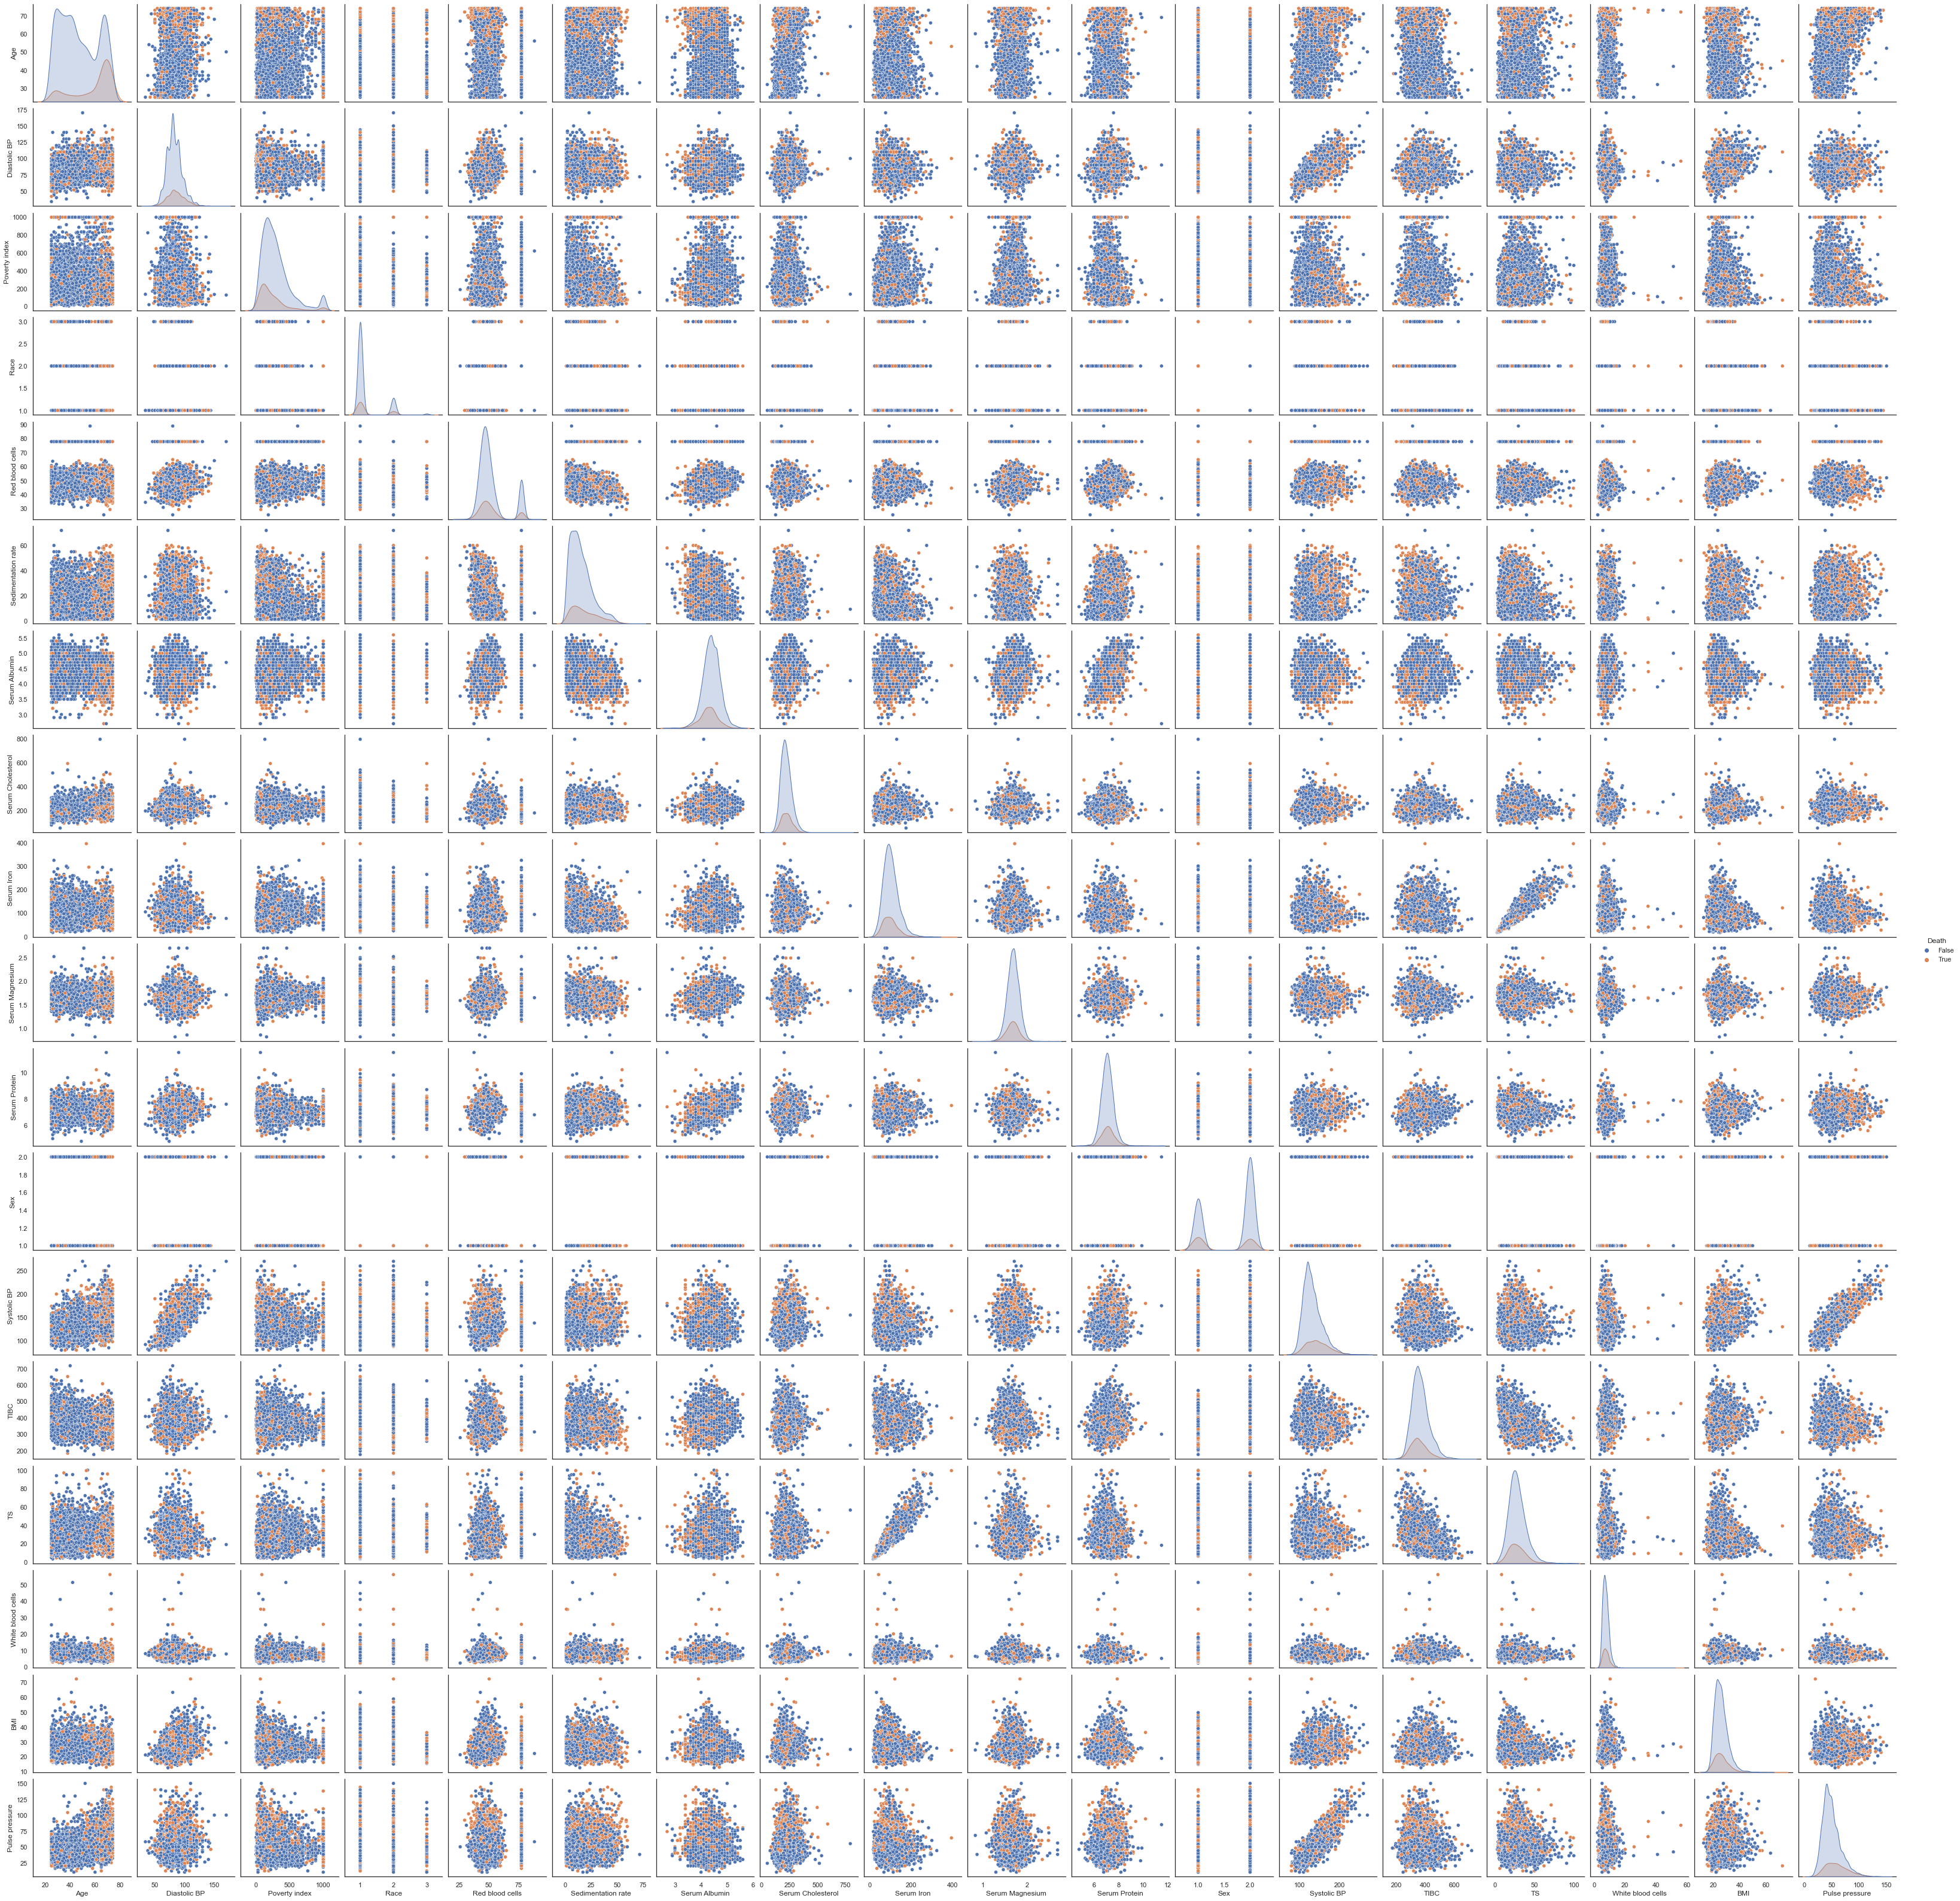

In [9]:
sns.pairplot(df_nhanesi_dev_data, hue='Death')


In [10]:
nhanesi_data_drift_report = Dashboard(tabs=[DataDriftTab()])
nhanesi_data_drift_report.calculate(df_nhanesi_dev_data, df_nhanesi_test_data)
nhanesi_data_drift_report.save("nhanesi_data_drift_report.html")

Truy cập file "nhanesi_data_drift_report.html" cùng thư mục làm việc để theo dõi đánh giá các thuộc tính dữ liệu trong 2t

# Kiểm tra độ cân bằng của nhãn

In [11]:
df_nhanesi_dev_data.Death.value_counts()

False    5562
True     1301
Name: Death, dtype: int64

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



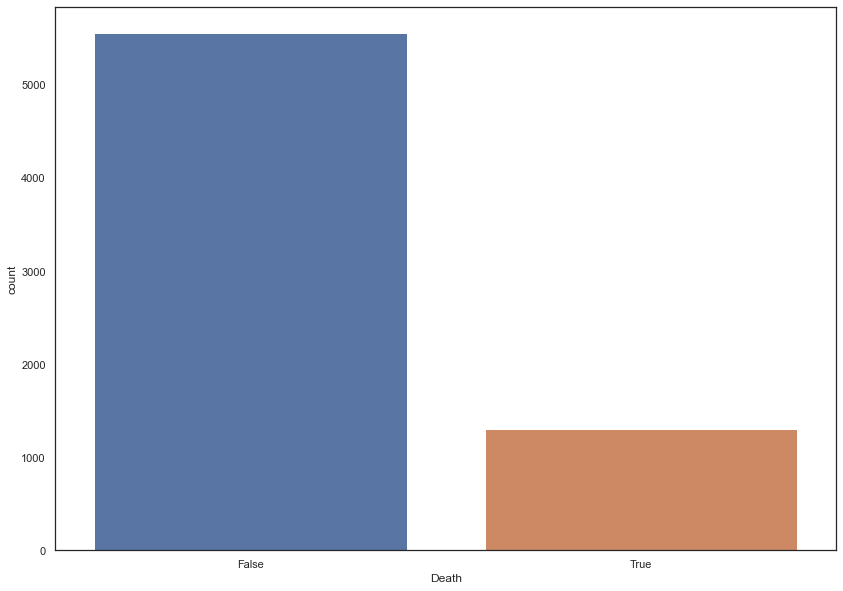

In [12]:
g = sns.countplot(df_nhanesi_dev_data['Death'])
g.set_xticklabels(['False','True'])
plt.show()

Kết luận: Data xảy ra hiện tượng mất cân bằng nhãn. Độ chênh lệch khá lớn ( False: 5562, True: 1310 )

# Phân tích tương quan giữa các trường dữ liệu với nhãn

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/homeb

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/homeb

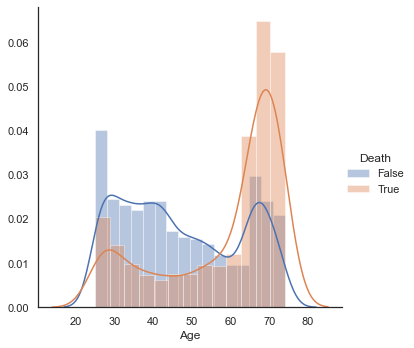

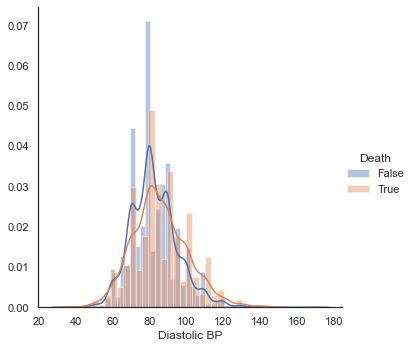

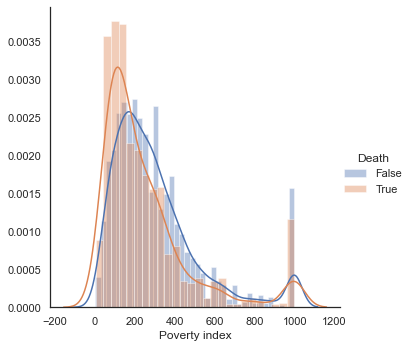

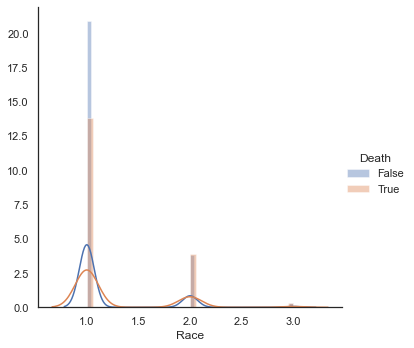

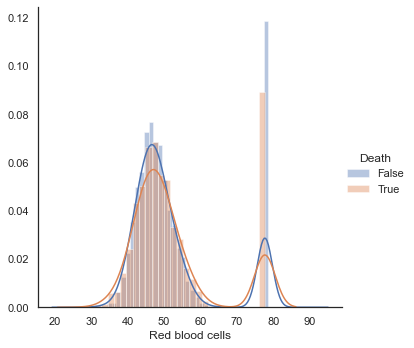

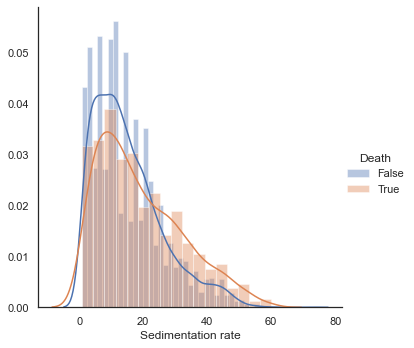

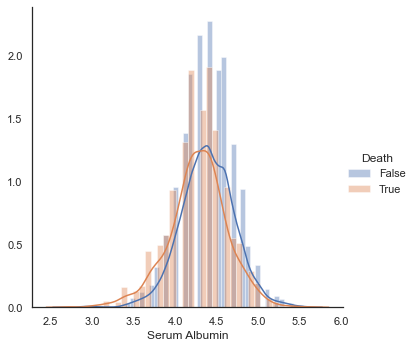

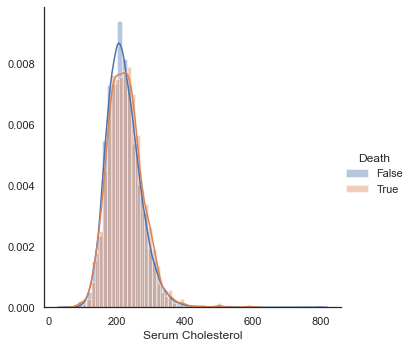

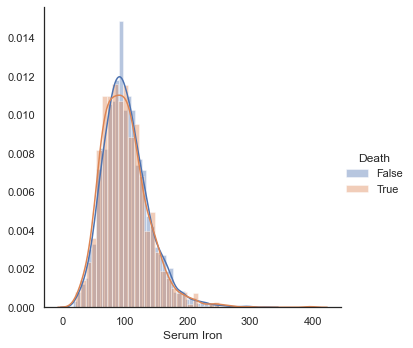

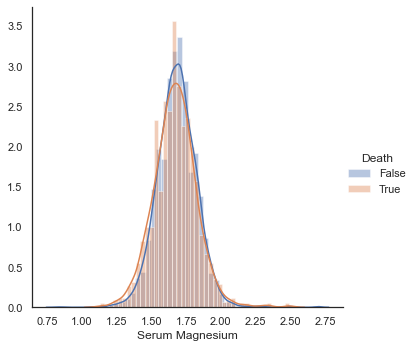

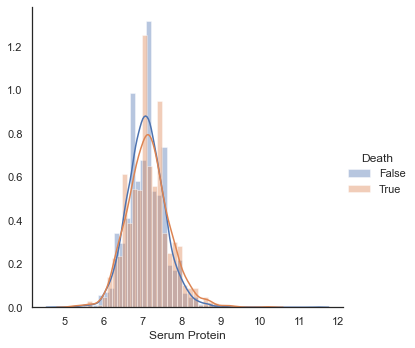

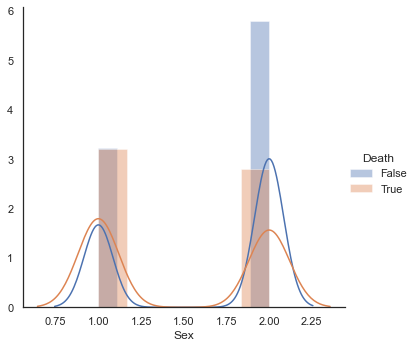

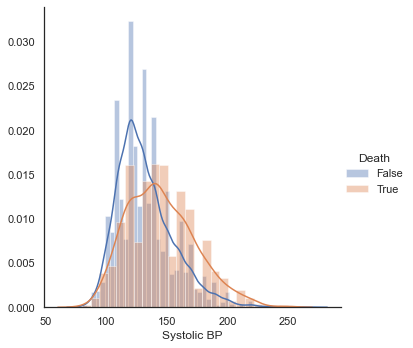

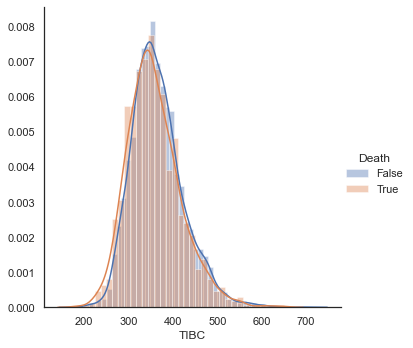

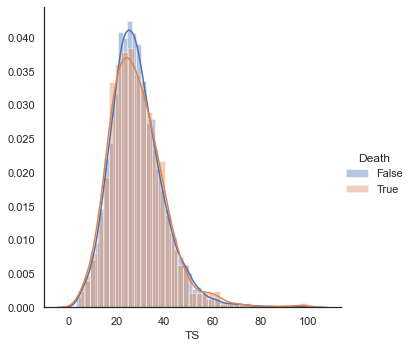

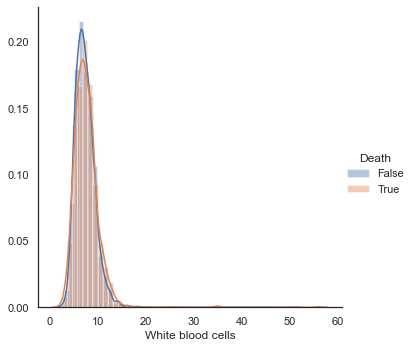

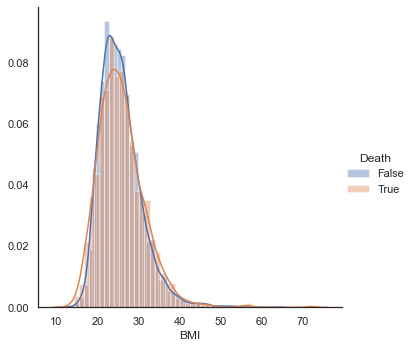

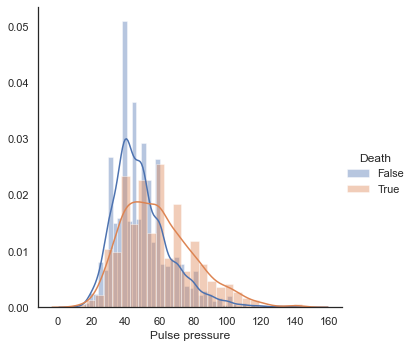

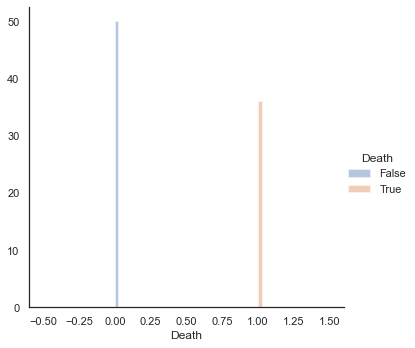

In [13]:
for i in df_nhanesi_dev_data.columns: 
    sns.FacetGrid(df_nhanesi_dev_data,hue='Death',height=5).map(sns.distplot,i).add_legend()
